# Contexto

13725 - Alexandre Pereira
19631 - Tiago Morais
24003 - Daniel Pires

O principal objetivo deste projeto é duplo: primeiro, desenvolver e avaliar o desempenho de algoritmos automáticos de classificação na distinção entre cogumelos comestíveis e venenosos; e segundo, aplicar técnicas de agrupamento, como K-means, para descobrir agrupamentos ou potenciais padrões dentro do conjunto de dados.

Ao longo desta exploração académica, iremos utilizar vários algoritmos de aprendizagem automática, incluindo árvores de decisão e agrupamento K-means, para analisar o conjunto de dados. O projeto envolverá pré-processamento de dados, avaliação e visualização de resultados. No final, pretendemos obter uma compreensão mais profunda das características do conjunto de dados e demonstrar a aplicação de técnicas de aprendizagem automática na resolução de problemas reais de classificação e agrupamento.

# Data 

Cogumelos - https://www.kaggle.com/datasets/uciml/mushroom-classification
Neste dataset podemos observar cogumelos que são venenosos ou seguros para comer.

In [79]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [80]:
# Declarar colunas do dataset
column_names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment",
                "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
                "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type",
                "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]

# Lê dados do dataset
mushroom_data = pd.read_csv('./input/mushrooms.csv', header=None, names=column_names)

#print('Features:',mushroom_feature_names, '   Classes:', mushroom_target_names)


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


le = LabelEncoder()
for column in mushroom_data.columns:
    mushroom_data[column] = le.fit_transform(mushroom_data[column])

# Separar os dados em features (X) e objetivo (y)
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']

# Dividir os dados em dataset de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Decision Tree

In [82]:
# -------------------------------------------- Decision Tree  --------------------------------------------

# Decision Tree Classifier
# dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42) # amostragem
dt_model = dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)
hd_score = dt_model.score(X_test, y_test)

# Avalia a Decision Tree classifier
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_class_report = classification_report(y_test, dt_y_pred)

# Apresenta resultados Decision Tree

print("Decision Tree Classifier Results:")
print("Score:", hd_score)
print("Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", dt_conf_matrix)
print("Classification Report:\n", dt_class_report)

Decision Tree Classifier Results:
Score: 0.9723076923076923
Accuracy: 0.9723076923076923
Confusion Matrix:
 [[852   6]
 [ 39 728]]
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.99      0.97       858
           2       0.99      0.95      0.97       767

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



# RandomForest

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42) # amostragem
rf_model = rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
# Avalia o RandomForest classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_class_report = classification_report(y_test, rf_y_pred)

# Apresenta resultados RandomForest
print("\nRandomForest Classifier Results:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", rf_class_report)


RandomForest Classifier Results:
Accuracy: 1.0
Confusion Matrix:
 [[858   0]
 [  0 767]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       858
           2       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Visualization

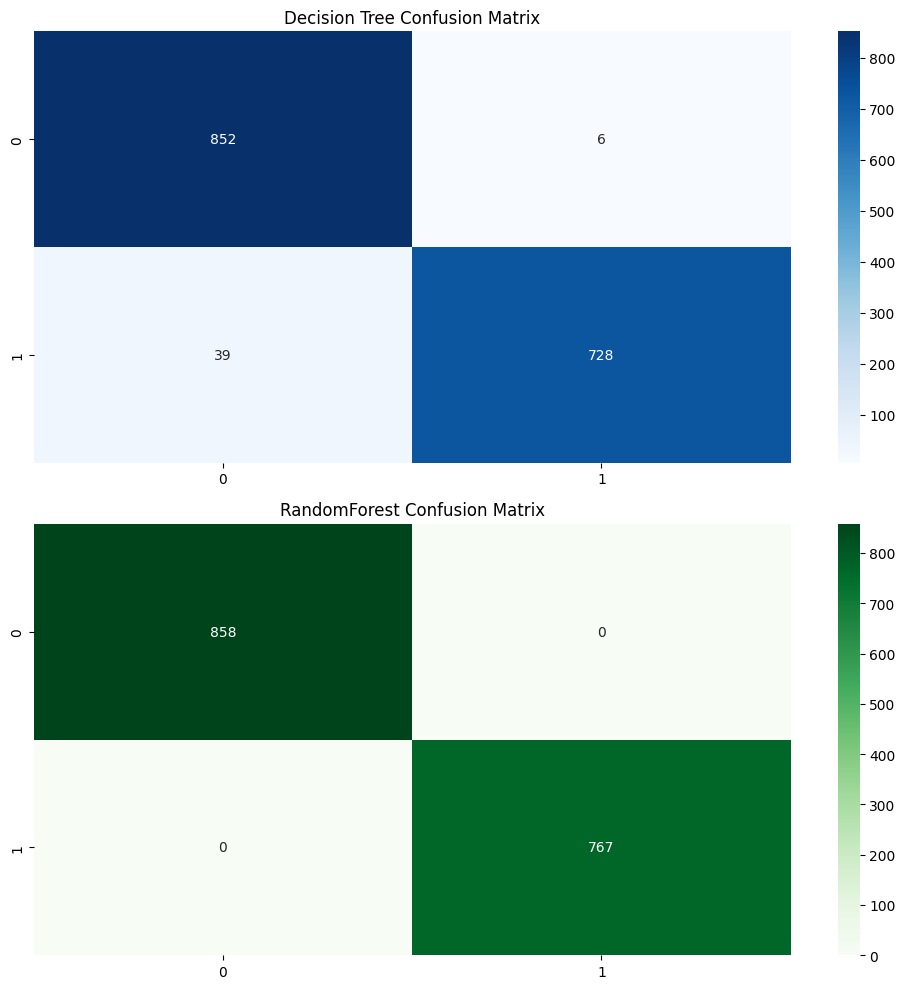

In [97]:
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns

# Visualizations
fig, axes = plt.subplots(2, 1, figsize=(10,10))

# Decision Tree Matriz Confusão 
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')

# RandomForest Matriz Confusão 
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('RandomForest Confusion Matrix')

plt.tight_layout()
